<a href="https://colab.research.google.com/github/Vaishnavichandur/project-by-me/blob/main/stockpred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd

# Download historical stock price data
ticker = 'AAPL'
data = yf.download(ticker, start='2010-01-01', end='2024-01-01')

# Display the first few rows of the data
data.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461976,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473148,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370184,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358408,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400680,447610800


In [2]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Create sequences
sequence_length = 60
X = []
y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

# Reshape the data to fit LSTM requirements
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [4]:
# Train the model
model.fit(X, y, epochs=25, batch_size=32)


Epoch 1/25
109/109 [==============================] - 10s 57ms/step - loss: 0.0081
Epoch 2/25
109/109 [==============================] - 7s 64ms/step - loss: 0.0018
Epoch 3/25
109/109 [==============================] - 6s 53ms/step - loss: 0.0018
Epoch 4/25
109/109 [==============================] - 7s 68ms/step - loss: 0.0014
Epoch 5/25
109/109 [==============================] - 6s 53ms/step - loss: 0.0014
Epoch 6/25
109/109 [==============================] - 7s 66ms/step - loss: 0.0015
Epoch 7/25
109/109 [==============================] - 7s 65ms/step - loss: 0.0012
Epoch 8/25
109/109 [==============================] - 15s 135ms/step - loss: 0.0013
Epoch 9/25
109/109 [==============================] - 9s 85ms/step - loss: 0.0013
Epoch 10/25
109/109 [==============================] - 6s 57ms/step - loss: 0.0012
Epoch 11/25
109/109 [==============================] - 7s 62ms/step - loss: 0.0012
Epoch 12/25
109/109 [==============================] - 6s 53ms/step - loss: 0.0010
Epoch 13/2

In [6]:
# Collect and prepare test data
test_data = data['Close'][-(sequence_length + len(y)):].values
scaled_test_data = scaler.transform(test_data.reshape(-1, 1))

X_test = []
for i in range(sequence_length, len(scaled_test_data)):
    X_test.append(scaled_test_data[i-sequence_length:i, 0])

X_test = np.array(X_test)


In [7]:
if len(X_test.shape) == 2:
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
else:
    print(f"Unexpected shape for X_test: {X_test.shape}")


109/109 [==============================] - 2s 16ms/step


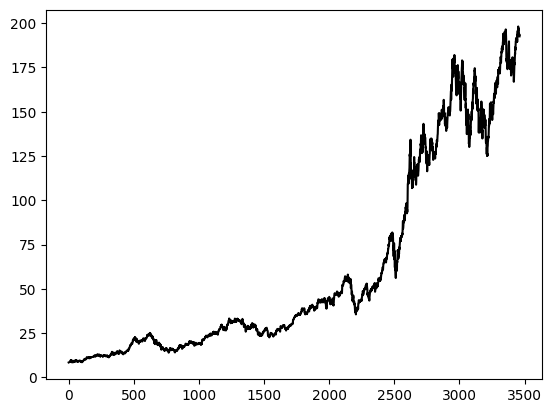

In [10]:
# Make predictions
import matplotlib.pyplot as plt
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Compare predicted prices with actual prices
actual_prices = data['Close'][-len(predicted_prices):].values

# Visualize the results
plt.plot(actual_prices, color='black', label='Actual Stock Price')


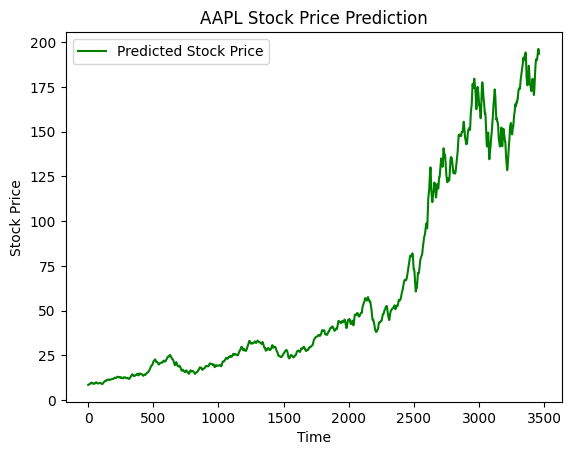

In [15]:
plt.plot(predicted_prices, color='green', label='Predicted Stock Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()